In [1]:
import pandas as pd

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib as plt

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
#讀資料

In [8]:
df = pd.read_csv("data/train.csv")

In [9]:
#觀察

In [10]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
7,7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
8,8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0
9,9,Female,62.0,0,0,Yes,Govt_job,Urban,62.68,18.4,formerly smoked,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [12]:
# 都沒缺值

In [13]:
#先把型態換成數值再來觀察各欄位與中風的關聯

In [14]:
df=pd.get_dummies(data=df,columns=['gender','ever_married','Residence_type','smoking_status','work_type'])

In [15]:
#這邊出現了Output exceeds the size limit錯誤，上網爬文後發現只要調整設定即可

In [16]:
#參考資料：https://stackoverflow.com/questions/72823258/vscode-interactive-python-output-exceeds-size-limit

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15304 non-null  int64  
 1   age                             15304 non-null  float64
 2   hypertension                    15304 non-null  int64  
 3   heart_disease                   15304 non-null  int64  
 4   avg_glucose_level               15304 non-null  float64
 5   bmi                             15304 non-null  float64
 6   stroke                          15304 non-null  int64  
 7   gender_Female                   15304 non-null  uint8  
 8   gender_Male                     15304 non-null  uint8  
 9   gender_Other                    15304 non-null  uint8  
 10  ever_married_No                 15304 non-null  uint8  
 11  ever_married_Yes                15304 non-null  uint8  
 12  Residence_type_Rural            

In [18]:
#重新觀察欄位

In [19]:
#下面和上課內容有些不同，我想先觀察各欄位與中風的關聯，利用這些圖表協助我決定等等要刪掉哪些欄位

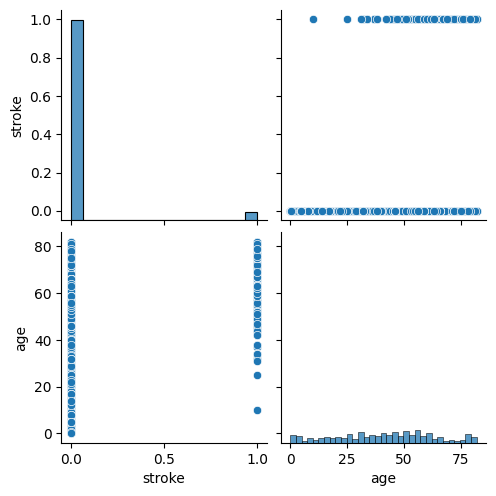

In [20]:
sns.pairplot(df[['stroke','age']],dropna=True)

In [21]:
#20歲以下比較少人中風

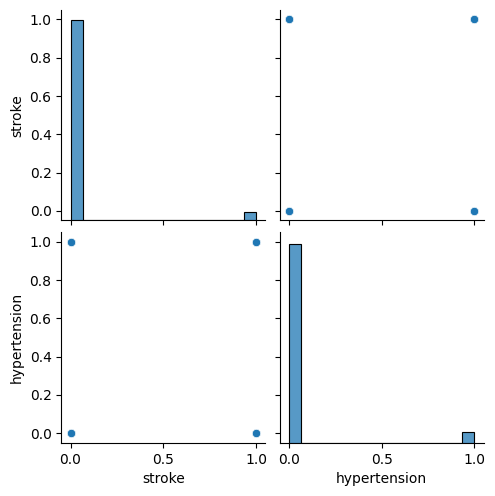

In [22]:
sns.pairplot(df[['stroke','hypertension']],dropna=True)

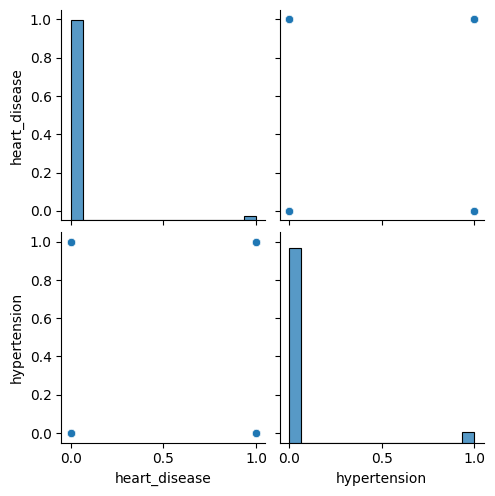

In [23]:
sns.pairplot(df[['heart_disease','hypertension']],dropna=True)

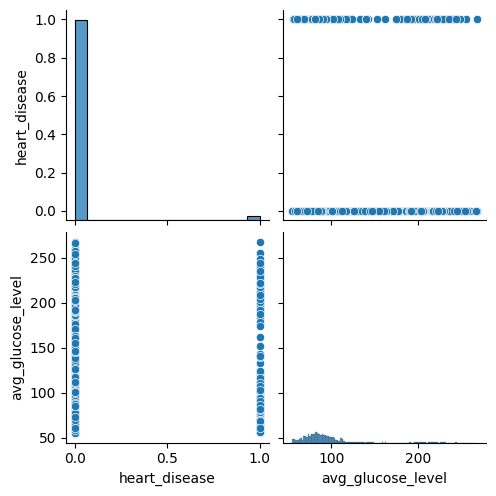

In [24]:
sns.pairplot(df[['heart_disease','avg_glucose_level']],dropna=True)

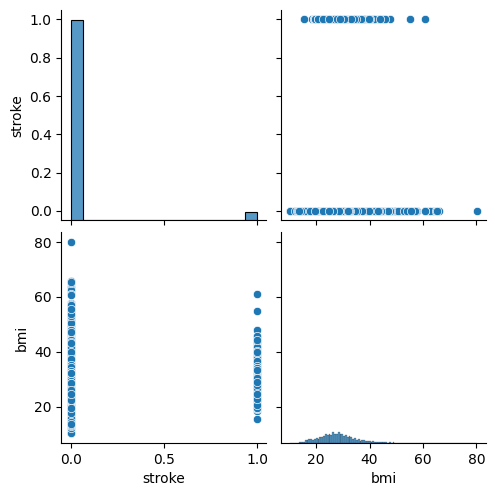

In [25]:
sns.pairplot(df[['stroke','bmi']],dropna=True)

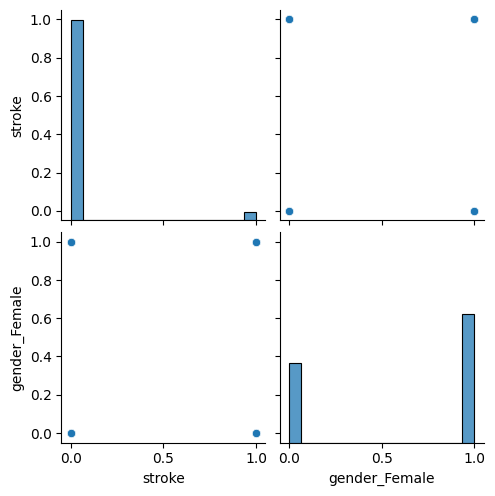

In [26]:
sns.pairplot(df[['stroke','gender_Female']],dropna=True)

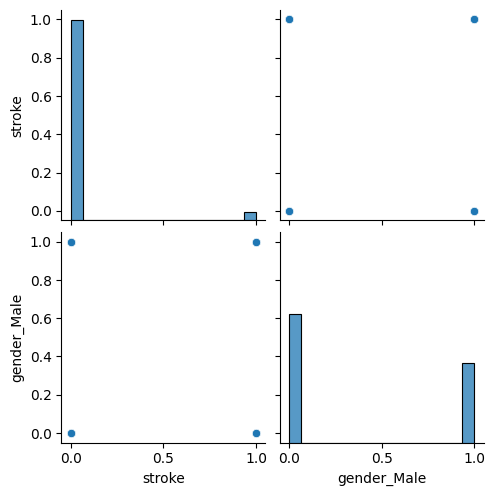

In [27]:
sns.pairplot(df[['stroke','gender_Male']],dropna=True)

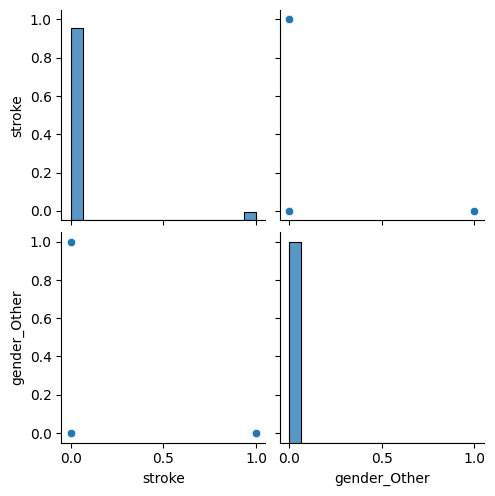

In [28]:
sns.pairplot(df[['stroke','gender_Other']],dropna=True)

In [29]:
df['gender_Other'].value_counts()

0    15303
1        1
Name: gender_Other, dtype: int64

In [30]:
#gender是other的那一個人沒有中風

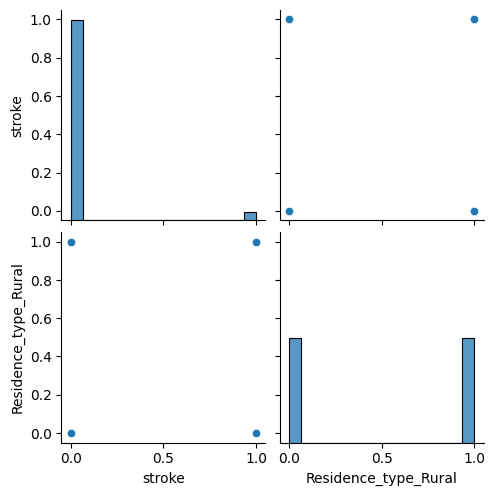

In [31]:
sns.pairplot(df[['stroke','Residence_type_Rural']],dropna=True)

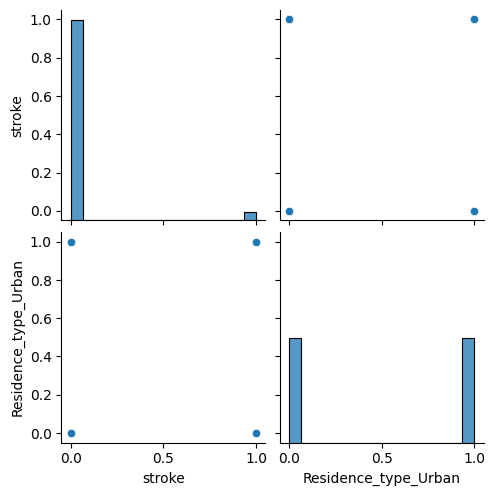

In [32]:
sns.pairplot(df[['stroke','Residence_type_Urban']],dropna=True)

In [33]:
#透過圖表我自己推論中風和上面這些項目好像沒有太大的關係（但這個思路後來想想好像是錯的）

In [34]:
#做到一半發現好像看不出什麼insight，我決定還是先依照自己的想法預測

In [35]:
#先換一個方式觀察數值

In [36]:
df.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
stroke,,,,,,,,,,,,,,,,,,,,,
0,7667.353394,40.254676,0.043143,0.019834,88.250602,28.021489,0.618730,0.381202,0.000068,0.332470,...,0.499250,0.302276,0.148446,0.410578,0.138700,0.099782,0.002863,0.637132,0.121388,0.138836
1,7283.460443,68.417722,0.202532,0.104430,107.362468,30.230696,0.582278,0.417722,0.000000,0.064873,...,0.498418,0.170886,0.251582,0.406646,0.170886,0.109177,0.000000,0.639241,0.250000,0.001582


In [37]:
#中風的人年紀平均比較大，血壓比較高，比較多有心臟病，葡萄糖、Bmi比較高

In [38]:
#開始預測！移除我覺得沒關聯的欄位

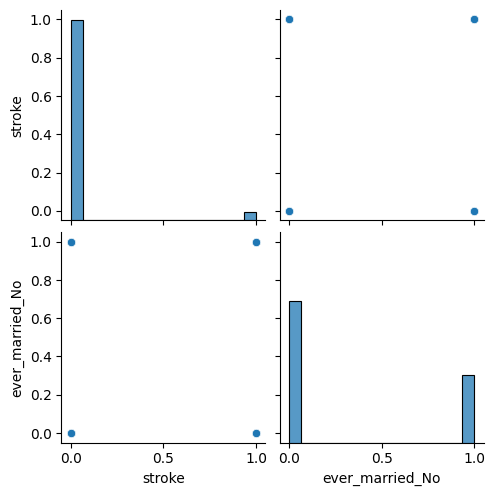

In [39]:
sns.pairplot(df[['stroke','ever_married_No']],dropna=True)

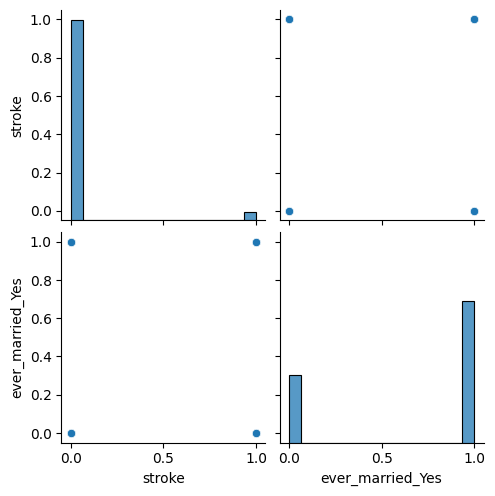

In [40]:
sns.pairplot(df[['stroke','ever_married_Yes']],dropna=True)

In [41]:
#看不出什麼東西，但還是先刪掉

In [42]:
df.drop(['ever_married_No','ever_married_Yes'],axis=1,inplace=True)

In [43]:
#看有沒有多餘的欄位要刪除

In [44]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,28.0,0,0,79.53,31.1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,1,33.0,0,0,78.44,23.9,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,2,42.0,0,0,103.00,40.3,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3,56.0,0,0,64.87,28.8,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4,4,24.0,0,0,73.36,28.8,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [45]:
df.drop('Residence_type_Rural',axis=1,inplace=True)

In [46]:
#住在鄉下或都市只要留一個就好，留下是否住在都市

In [47]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
id,1.000000,-0.003302,-0.012186,-0.005429,0.001450,-0.013436,-0.017290,0.011519,-0.011571,0.003132,-0.008072,0.003040,-0.003677,-0.003733,0.005100,-0.007432,0.010475,-0.003107,0.006389,0.003096
age,-0.003302,1.000000,0.232629,0.193394,0.108897,0.390721,0.261320,0.033017,-0.032815,-0.012220,0.013268,-0.402718,0.254896,0.136508,0.072485,0.119597,-0.062525,0.156114,0.328604,-0.638695
hypertension,-0.012186,0.232629,1.000000,0.074178,0.122834,0.106665,0.145895,-0.005385,0.005416,-0.001849,0.002463,-0.105865,0.049130,0.045020,0.024634,0.022799,-0.012000,-0.009330,0.085472,-0.088775
heart_disease,-0.005429,0.193394,0.074178,1.000000,0.137147,0.054583,0.111518,-0.061764,0.061787,-0.001249,0.007602,-0.051144,0.069182,-0.013657,0.014982,0.001787,-0.008107,-0.006741,0.069976,-0.059300
avg_glucose_level,0.001450,0.108897,0.122834,0.137147,1.000000,0.108142,0.149273,-0.035549,0.035514,0.002221,-0.015051,-0.037291,0.046621,-0.017859,0.026088,-0.005462,0.002465,0.006184,0.028379,-0.032088
bmi,-0.013436,0.390721,0.106665,0.054583,0.108142,1.000000,0.065393,0.015440,-0.015238,-0.012161,0.003404,-0.304473,0.121901,0.125664,0.096367,0.087435,-0.024589,0.232600,0.082313,-0.483226
stroke,-0.017290,0.261320,0.145895,0.111518,0.149273,0.065393,1.000000,-0.014922,0.014950,-0.001678,-0.000331,-0.057223,0.057051,-0.001591,0.018455,0.006227,-0.010888,0.000873,0.076933,-0.080381
gender_Female,0.011519,0.033017,-0.005385,-0.061764,-0.035549,0.015440,-0.014922,1.000000,-0.999862,-0.010265,0.002798,-0.075047,-0.039411,0.108553,-0.014222,0.000804,-0.002373,0.051678,0.023926,-0.096901
gender_Male,-0.011571,-0.032815,0.005416,0.061787,0.035514,-0.015238,0.014950,-0.999862,1.000000,-0.006365,-0.002664,0.074843,0.039469,-0.108444,0.014276,-0.000759,0.002380,-0.051501,-0.023876,0.096561
gender_Other,0.003132,-0.012220,-0.001849,-0.001249,0.002221,-0.012161,-0.001678,-0.010265,-0.006365,1.000000,-0.008071,0.012441,-0.003432,-0.006745,-0.003262,-0.002697,-0.000424,-0.010714,-0.003079,0.020624


In [48]:
#看不出東西，所以先不刪任何欄位

In [49]:
#Prepare training data

In [50]:
X = df.drop(['stroke'],axis=1)

In [51]:
y=df['stroke']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=43)

In [54]:
#using Logistic regression model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr=LogisticRegression()

In [57]:
lr.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predictions=lr.predict(X_test)

In [59]:
#Evaluate

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [61]:
accuracy_score(y_test,predictions)

0.953397212543554

In [62]:
recall_score(y_test,predictions)

0.024752475247524754

In [63]:
precision_score(y_test,predictions)

0.22727272727272727

In [64]:
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predict not stroke', 'Predict stroke'],index=['True not stroke','True stroke'])

,Predict not stroke,Predict stroke
True not stroke,4373,17
True stroke,197,5


In [65]:
import joblib

In [66]:
joblib.dump(lr,'stroke_prediction version1.pkl',compress=3)

['stroke_prediction version1.pkl']